In [1]:
%matplotlib inline
from matplotlib import pyplot as plt, cm
import numpy as np
import cv2

In [2]:
def color_transfer(source, target):
	# convert the images from the RGB to L*ab* color space, being
	# sure to utilizing the floating point data type (note: OpenCV
	# expects floats to be 32-bit, so use that instead of 64-bit)
	source = cv2.cvtColor(source, cv2.COLOR_BGR2LAB).astype("float32")
	target = cv2.cvtColor(target, cv2.COLOR_BGR2LAB).astype("float32")
  
	# compute color statistics for the source and target images
	(lMeanSrc, lStdSrc, aMeanSrc, aStdSrc, bMeanSrc, bStdSrc) = image_stats(source)
	(lMeanTar, lStdTar, aMeanTar, aStdTar, bMeanTar, bStdTar) = image_stats(target)
 
	# subtract the means from the target image
	(l, a, b) = cv2.split(target)
	l -= lMeanTar
	a -= aMeanTar
	b -= bMeanTar
 
	# scale by the standard deviations
	l = (lStdTar / lStdSrc) * l
	a = (aStdTar / aStdSrc) * a
	b = (bStdTar / bStdSrc) * b
 
	# add in the source mean
	l += lMeanSrc
	a += aMeanSrc
	b += bMeanSrc
 
	# clip the pixel intensities to [0, 255] if they fall outside
	# this range
	l = np.clip(l, 0, 255)
	a = np.clip(a, 0, 255)
	b = np.clip(b, 0, 255)
 
	# merge the channels together and convert back to the RGB color
	# space, being sure to utilize the 8-bit unsigned integer data
	# type
	transfer = cv2.merge([l, a, b])
	transfer = cv2.cvtColor(transfer.astype("uint8"), cv2.COLOR_LAB2BGR)
	
	# return the color transferred image
	return transfer


def image_stats(image):
	# compute the mean and standard deviation of each channel
	(l, a, b) = cv2.split(image)
	(lMean, lStd) = (l.mean(), l.std())
	(aMean, aStd) = (a.mean(), a.std())
	(bMean, bStd) = (b.mean(), b.std())
 
	# return the color statistics
	return (lMean, lStd, aMean, aStd, bMean, bStd)

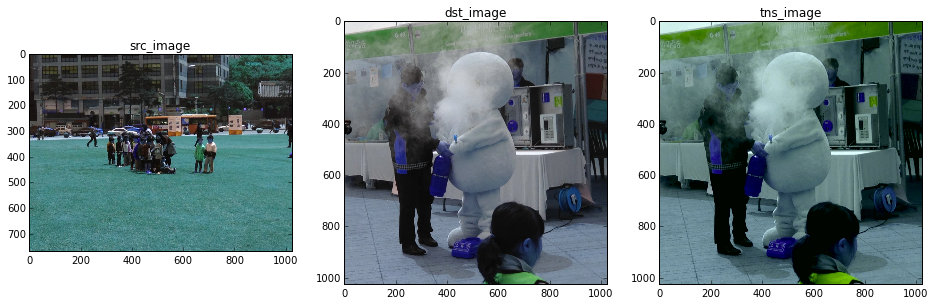

In [10]:
src_image = cv2.imread("./data/thumb_IMG_4181_1024.jpg")
dst_image = cv2.imread("./data/thumb_IMG_3941_1024.jpg")
tns_image = color_transfer(src_image, dst_image)

plt.figure(figsize=(16,12))
plt.subplot(131), plt.imshow(src_image, cmap = 'gray')
plt.title('src_image')
plt.subplot(132), plt.imshow(dst_image, cmap = 'gray')
plt.title('dst_image')
plt.subplot(133), plt.imshow(tns_image, cmap = 'gray')
plt.title('tns_image')